#### Aluno: Carlos Eduardo Fontaneli RA 769949

### Bibliotecas

Para a elaboração do `padding` foi necessário importar a biblioteca `numpy` para manipulação de vetores de valores relativos as imagens e, a biblioteca `matplotlib.pyplot` para impressão das imagens. Além disso, usou-se a biblioteca `skimage` para desenho de quadrados em imagens.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle_perimeter 

### Implementação da correlação de Pearson

Seja $Ĩ_g$ a região da imagem $I_g$ que está sob o template $I_o$ quando este está na posição $(r,c)$ e sejam:<br>
$\mu_{rc}$: Média dos valores de $Ĩ_g$<br>
$\mu_{I_o}$: Média dos valores de $I_o$<br>
$\sigma_{rc}$: Desvio padrão dos valores de $Ĩ_g$<br>
$\sigma_{I_o}$: Desvio padrão dos valores de $Ĩ_g$<br>


\begin{equation}
\large
d(r,c)= \frac{\sum_{s=0}^{R-1}\sum_{t=0}^{C-1}(I_g(r+s-R/2, c+t-C/2)-\mu_{rc})(I_o(s,t)-\mu_{I_o})}{\sqrt((\sigma_{rc}^2)(\sigma_{I_o}^2))}
\end{equation}

In [2]:
def pearson_correlation(img, obj):
    num_rows, num_cols = img.shape
    num_rows_obj, num_cols_obj = obj.shape   

    half_num_rows_obj = num_rows_obj//2     
    half_num_cols_obj = num_cols_obj//2

    img_padded = np.pad(img, ((half_num_rows_obj, half_num_rows_obj),
                             (half_num_cols_obj, half_num_cols_obj)), 
                             mode='reflect')
    
    img_pc = np.zeros((num_rows, num_cols))
    
    # calculando a média e o desvio padrão do objeto a ser procurado na imagem
    obj_mean = np.mean(obj)
    obj_std = np.std(obj) ** 2
    coefficient = (obj - obj_mean) 
    for row in range(num_rows):
        for col in range(num_cols):
            # patch é a região de img de mesmo tamanho que obj e centrada em (row, col)
            patch = img_padded[row:row+num_rows_obj, col:col+num_cols_obj]
            
            # calculando a média e o desvio padrão do patch
            patch_std = np.std(patch)
            patch_mean = np.mean(patch)
            
            # cálculo do coeficente de pearson
            diff_region = (patch - patch_mean) * coefficient
            img_pc[row, col] = np.sum(diff_region) / (np.sqrt((patch_std**2)*obj_std))
            
    return img_pc

In [3]:
# Acha o ponto de máximo de uma imagem
def find_max(img):
    ind_max = np.argmax(img)     
    row_max = ind_max//img.shape[1]
    col_max = ind_max - row_max*img.shape[1]
    index = (row_max, col_max)
    max_val = img[index]
    
    return max_val, index

# Desenha um quadrado ao redor de um centro em uma imagem
def draw_square(img_g, center, size):
    upper_left_p = (center[0] - size[0]//2, center[1] - size[1]//2)
    coords = rectangle_perimeter(upper_left_p, extent=size)

    img_box = img_g.copy()
    img_box[coords] = 255    
    
    return img_box

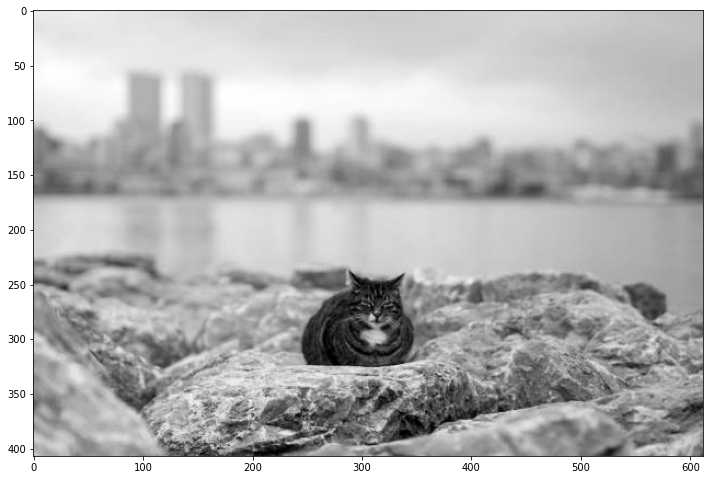

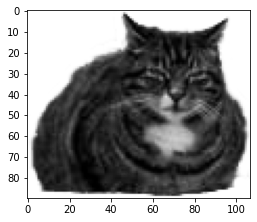

In [4]:
# Lendo a imagem preto e branco a ser usada
img_cat = plt.imread('Imgs/imagem_global.tiff')
img_cat = img_cat
# Lendo o objeto a ser procurado na imagem
cat_obj = plt.imread('Imgs/gato.tiff')
cat_obj = cat_obj

plt.figure(figsize=[12,12])
plt.imshow(img_cat, 'gray')
plt.figure(figsize=[4, 4])
_ = plt.imshow(cat_obj, 'gray')

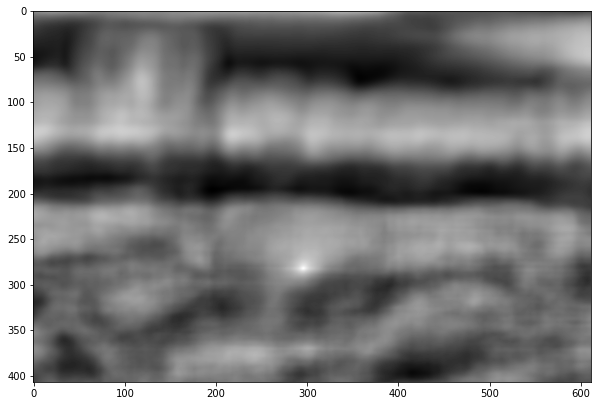

In [5]:
# Aplicando a correlação de Pearson e vendo a imagem resultante
img_pc_cat = pearson_correlation(img_cat, cat_obj)
plt.figure(figsize=[10,10])
plt.imshow(img_pc_cat, 'gray')
_ = plt.savefig('Imgs/img_pc_cat.png', bbox_inches='tight')

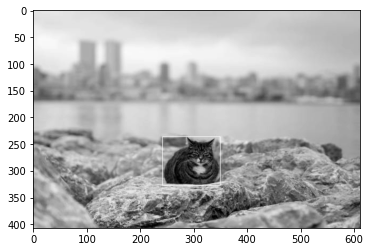

In [6]:
# Fazendo a demarcação do objeto procurado na imagem original
max_value, index = find_max(img_pc_cat)
img_square_cat = draw_square(img_cat, index, cat_obj.shape)
plt.imshow(img_square_cat, 'gray')
plt.savefig('Imgs/square_cat.png')

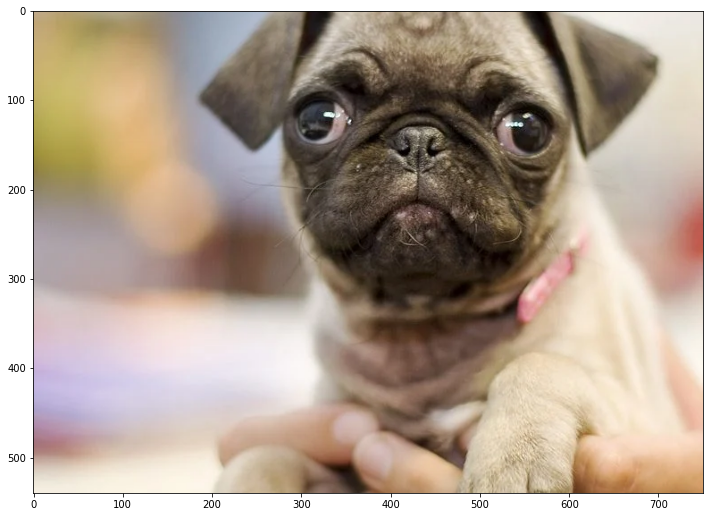

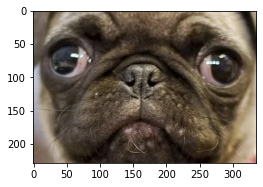

In [7]:
# Teste em imagens coloridas
img_dog = plt.imread('Imgs/dog.png')
dog_obj = plt.imread('Imgs/dog_face.png')

plt.figure(figsize=[12,12])
plt.imshow(img_dog)
plt.figure(figsize=[4, 4])
_ = plt.imshow(dog_obj)

In [8]:
# Adaptação da função para imagens com n dimensões(canais de cores)
def n_dim_pc(img, obj):
  num_rows, num_cols, num_dims = img.shape
 
  new_array = np.zeros((num_rows, num_cols, num_dims))

  # Aplicação da correlação de Pearson em cada canal de cor da imagem original
  for i in range(num_dims):
    new_array[:, :, i] = pearson_correlation(img[:, :, i], obj[:, :, i])

      
  return new_array

In [9]:
# Imagem resultante
img_pc_dog = n_dim_pc(img_dog, dog_obj)
plt.figure(figsize=[10,10])
plt.imshow(img_pc_dog)
_ = plt.savefig('Imgs/img_pc_dog.png', bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


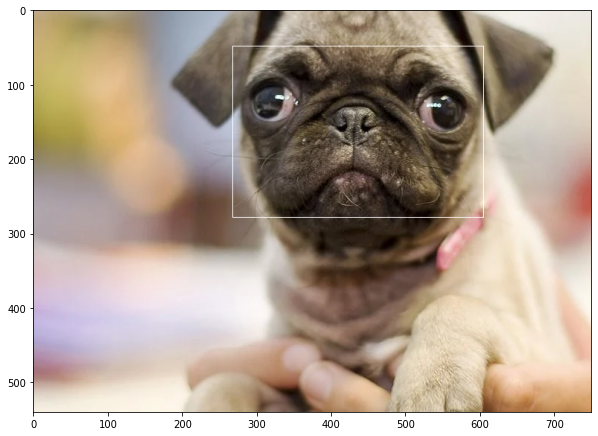

In [ ]:
# Destaque do objeto procurado na imagem original
num_rows, num_cols, num_dims = img_dog.shape
img_square_dog = np.zeros((num_rows, num_cols, num_dims))

# É necessário achar o ponto de máximo e traçar o quadrado em cada canal de cor da imagem
num_rows_o, num_cols_o, num_dims_o = dog_obj.shape
for i in range(num_dims):
    max_val, index = find_max(img_pc_dog[:, :, i])
    img_square_dog[:, :, i] = draw_square(img_dog[:, :, i], index, [num_rows_o, num_cols_o])

plt.figure(figsize=[10,10])
plt.imshow(img_square_dog)
_ = plt.savefig('Imgs/square_dog.png', bbox_inches='tight')